<a href="https://colab.research.google.com/github/DRA0R/Exploratory_data_analysis/blob/main/analisis_exploratorio_matrizconfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets
import numpy as np

In [ ]:
iris = datasets.load_iris()

In [ ]:
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
data ['target']=iris.target

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data['name_t'] = data['target'].map({0:'setosa',
                    1 : 'versicolor',
                    2 : 'virginica'})

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name_t
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target=['target','name_t']
desc= list(set(list(data.columns))-set(target))

In [ ]:
desc

['sepal length (cm)',
 'petal width (cm)',
 'petal length (cm)',
 'sepal width (cm)']

In [ ]:
X = data[desc].values
y= data['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 40)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg_1= DecisionTreeRegressor(max_depth=4)
reg_1.fit(X_train,y_train)

y_predict = reg_1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
matrix_confusion = confusion_matrix(y_test,y_predict)

Text(0.5, 257.44, 'Etiqueta prediccion')

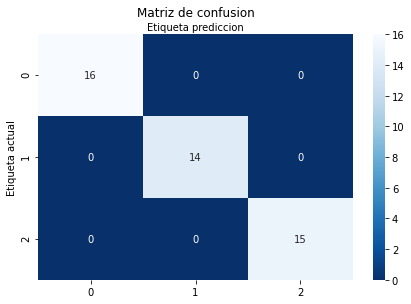

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

matrix_confusion = confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(matrix_confusion), annot=True ,cmap='Blues_r',fmt ='g')

ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y =1.1)

plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta prediccion')